<a href="https://colab.research.google.com/github/akashpatil108/Deep-Learning/blob/main/Bidirectional_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional LSTM RNN

- akash patil
- aakashgolu1008@gmail.com

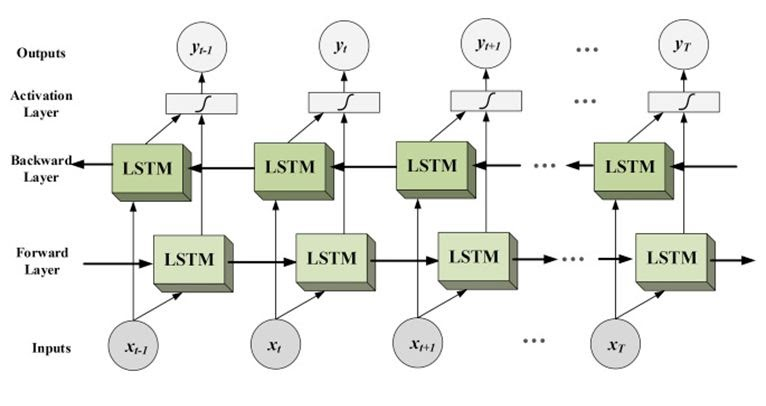

# 1. What is Bidirectional LSTM RNN?
   - Bidirectional LSTM RNN (Long Short-Term Memory Recurrent Neural Network) is a type of recurrent neural network architecture that processes sequential data, such as text or time-series data.
   - It consists of two LSTM layers: one processes the input sequence from the beginning (forward LSTM), and the other processes the input sequence from the end (backward LSTM).
   - The output of both LSTM layers is combined to capture information from both past and future contexts.

# 2. Why is Bidirectional LSTM RNN used?
  - Bidirectional LSTM RNN is used in tasks where context from both past and future elements is crucial for making accurate predictions or capturing dependencies.
   - It helps to capture long-range dependencies in the input data by incorporating information from both directions.

# 3. When is Bidirectional LSTM RNN used?
   - It is used in various natural language processing (NLP) tasks such as sentiment analysis, named entity recognition, and machine translation.
   - Also applied in speech recognition, time-series forecasting, and other sequential data analysis tasks.

# 4. How is Bidirectional LSTM RNN used?
   - During training, the forward and backward LSTM layers process the input sequence simultaneously.
   - The outputs from both directions are concatenated or combined to create the final representation for each time step.
   - This bidirectional context helps the model understand the input sequence more comprehensively and make informed predictions.

In summary, Bidirectional LSTM RNN is a variant of the LSTM architecture that captures information from both past and future contexts, making it suitable for tasks requiring a deep understanding of sequential data and dependencies. It is commonly used in NLP, speech recognition, and time-series analysis.

# Solving Fake news classifier problem

In [ ]:
# import the dataset from the kaggle throu the api
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c fake-news

 88% 41.0M/46.5M [00:00<00:00, 95.8MB/s]
100% 46.5M/46.5M [00:00<00:00, 88.0MB/s]


In [ ]:
import zipfile
import os
file_path="/content/fake-news.zip"
destination_path="/content/fake-news/"
with zipfile.ZipFile(file_path,'r')as zip_ref:
  zip_ref.extractall(destination_path)

# import the libraries


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import re


In [ ]:

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

## import the dataset

In [ ]:

train_fn=pd.read_csv('/content/fake-news/train.csv')
train_fn.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
train_fn.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64


<Axes: >

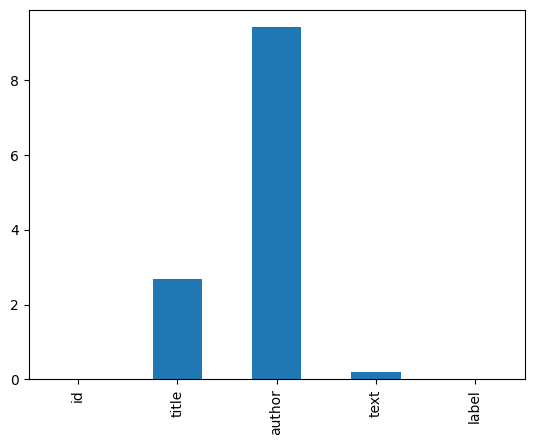

In [ ]:
# find the percentage of the null values
print(train_fn.isnull().mean()*100)
(train_fn.isnull().mean()*100).plot(kind='bar')

In [ ]:
train_fn.shape

(20800, 5)

In [ ]:
# we are droping the null values from dataset
train_fn.dropna(inplace=True)

In [ ]:
#  Resetting the index is essential when you drop null values or perform any other data transformations
# that may cause a change in the DataFrame's index. If you don't reset the index after such operations,
# the index may have gaps or missing values, which can lead to errors when using for loops or accessing
# specific rows using integer-based indexing.
train_fn.reset_index(inplace=True)

In [ ]:
train_fn.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
train_fn.shape

(18285, 6)

In [ ]:
# get the independent features
X=train_fn.drop(['label','index'	,'id'],axis=1)
# get dependent frature
y=train_fn.label
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
X.head()

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
# check the weather dataset is balanced or not
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

The dataset is not perfectly balanced but we can use as it is

# Data preprocessing

In [ ]:
# vocabulary size
voc_size=5000

In [ ]:
messages=X.copy()

In [ ]:
messages.head(10)

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# applying the stemmer and stopwards with lower case
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  review=re.sub('[^a-zA-Z]',' ', messages['title'][i])

  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

# one hot representation

In [ ]:
one_hot_= [one_hot(word,voc_size)for word in corpus]
one_hot_

[[3002, 342, 4501, 3650, 1250, 68, 1322, 614, 1544, 2023],
 [2583, 1578, 4649, 2118, 3359, 2097, 243],
 [4962, 3364, 3350, 1511],
 [1873, 2704, 3818, 2694, 3685, 420],
 [2100, 3359, 183, 322, 415, 180, 3359, 1057, 3527, 985],
 [2185,
  3734,
  756,
  2259,
  4428,
  862,
  71,
  597,
  3431,
  2717,
  4854,
  2792,
  1377,
  4368,
  243],
 [196, 136, 209, 3018, 3984, 558, 507, 4690, 4400, 1215, 1767],
 [164, 3127, 2739, 3105, 2177, 1777, 862, 3519, 4400, 1215, 1767],
 [385, 2737, 2084, 3189, 2726, 2732, 2103, 4945, 862, 38],
 [293, 3272, 982, 678, 534, 431, 1272, 2075],
 [2750, 576, 316, 1090, 320, 4978, 2532, 2061, 4866, 4963, 1254],
 [2694, 4926, 1250, 2732, 862, 2177],
 [2663, 3334, 4328, 728, 3298, 2078, 650, 4859, 2754],
 [3335, 3149, 2858, 902, 4740, 4784, 1391, 4400, 1215, 1767],
 [1151, 2407, 1013, 542, 3266, 4400, 1215, 1767],
 [2919, 3784, 2862, 3743, 1944, 426, 1817, 1976, 971, 1446],
 [1254, 3644, 1578],
 [166, 4006, 2001, 2927, 862, 3591, 4191, 243],
 [3069, 2738, 4649, 17

In [ ]:
# this is the sample of one hot encoded for the 10th sentence
print(corpus[10])
one_hot_[10]

russian research discov secret nazi militari base treasur hunter arctic photo


[2750, 576, 316, 1090, 320, 4978, 2532, 2061, 4866, 4963, 1254]

# Embedding Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(one_hot_,padding='post',maxlen=sent_length)
embedded_docs

array([[3002,  342, 4501, ...,    0,    0,    0],
       [2583, 1578, 4649, ...,    0,    0,    0],
       [4962, 3364, 3350, ...,    0,    0,    0],
       ...,
       [2729, 1812, 1240, ...,    0,    0,    0],
       [3838, 2177,  311, ...,    0,    0,    0],
       [3639, 4168,  965, ...,    0,    0,    0]], dtype=int32)

# Creating Model

In [ ]:
from nltk.translate import metrics
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
## train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
## Model Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
383/383 [==============================] - 33s 55ms/step - loss: 0.2589 - accuracy: 0.8825 - val_loss: 0.1851 - val_accuracy: 0.9226
Epoch 2/10
383/383 [==============================] - 7s 17ms/step - loss: 0.1223 - accuracy: 0.9544 - val_loss: 0.1944 - val_accuracy: 0.9193
Epoch 3/10
383/383 [==============================] - 5s 14ms/step - loss: 0.0907 - accuracy: 0.9684 - val_loss: 0.2496 - val_accuracy: 0.9085
Epoch 4/10
383/383 [==============================] - 8s 20ms/step - loss: 0.0610 - accuracy: 0.9796 - val_loss: 0.3063 - val_accuracy: 0.9133
Epoch 5/10
383/383 [==============================] - 6s 15ms/step - loss: 0.0387 - accuracy: 0.9873 - val_loss: 0.3517 - val_accuracy: 0.9012
Epoch 6/10
383/383 [==============================] - 6s 15ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.3322 - val_accuracy: 0.9065
Epoch 7/10
383/383 [==============================] - 5s 13ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.4089 - val_accuracy: 0.905

In [ ]:
y_pred=model.predict(X_test)

189/189 [==============================] - 1s 3ms/step


In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[3149,  270],
       [ 301, 2315]])

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9053852526926264


# Using the Word2vec

This coding is being created using AI (chatGPT)

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import nltk
import re
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import Word2Vec

# Load the dataset
train_fn = pd.read_csv('/content/fake-news/train.csv')

# Drop rows with null values and reset index
train_fn.dropna(inplace=True)
train_fn.reset_index(drop=True, inplace=True)

# Separate the independent features (X) and the dependent feature (y)
X = train_fn.drop(['label', 'id'], axis=1)
y = train_fn['label']

# Tokenization and preprocessing
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Vocabulary size
voc_size = 5000

# One-hot representation
one_hot_corpus = [one_hot(word, voc_size) for word in corpus]

# Padding sequences
sent_length = 20
embedded_docs = pad_sequences(one_hot_corpus, padding='post', maxlen=sent_length)

# Training Word2Vec on your dataset
word2vec_model = Word2Vec(sentences=[sentence.split() for sentence in corpus], vector_size=100, window=5, min_count=1, sg=1)

# Creating the Model
model = Sequential()
model.add(Embedding(voc_size, 100, input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

# Compiling the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embedded_docs, y, test_size=0.33, random_state=42)

# Model Training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Prediction and Evaluation
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           500000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 661,001
Trainable params: 661,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
383/383 [==============================] - 32s 66ms/step - loss: 0.2510 - accuracy: 0.8873 - val_loss: 0.1947 - val_accuracy: 0.9175
Epoch 2/10
383/383 [==============================] - 6s 15ms/step - loss: 0.1252 - accuracy: 0.9

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3132  287]
 [ 241 2375]]
0.9125103562551782
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3419
           1       0.89      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



# Try to Improve the accuracy

This coding is being created using AI (chatGPT)

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import nltk
import re
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import Word2Vec

# Load the dataset
train_fn = pd.read_csv('/content/fake-news/train.csv')

# Drop rows with null values and reset index
train_fn.dropna(inplace=True)
train_fn.reset_index(drop=True, inplace=True)

# Separate the independent features (X) and the dependent feature (y)
X = train_fn.drop(['label', 'id'], axis=1)
y = train_fn['label']

# Tokenization and preprocessing
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Vocabulary size
voc_size = 5000

# One-hot representation
one_hot_corpus = [one_hot(word, voc_size) for word in corpus]

# Padding sequences
sent_length = 20
embedded_docs = pad_sequences(one_hot_corpus, padding='post', maxlen=sent_length)

# Training Word2Vec on your dataset
word2vec_model = Word2Vec(sentences=[sentence.split() for sentence in corpus], vector_size=100, window=5, min_count=1, sg=1)

# Creating the Model
model = Sequential()
model.add(Embedding(voc_size, 100, input_length=sent_length))
model.add(Bidirectional(LSTM(256)))  # Increase the number of units in the LSTM cell
model.add(Dense(1, activation='sigmoid'))

# Compiling the Model with RMSprop optimizer and a learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embedded_docs, y, test_size=0.33, random_state=42)

# Model Training for more epochs (e.g., 20)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Prediction and Evaluation
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           500000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              731136    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,231,649
Trainable params: 1,231,649
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
383/383 [==============================] - 22s 45ms/step - loss: 0.2682 - accuracy: 0.8762 - val_loss: 0.2140 - val_accuracy: 0.9140
Epoch 2/20
383/383 [==============================] - 6s 15ms/step - loss: 0.1515 - accuracy:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3144  275]
 [ 368 2248]]
0.8934548467274234
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3419
           1       0.89      0.86      0.87      2616

    accuracy                           0.89      6035
   macro avg       0.89      0.89      0.89      6035
weighted avg       0.89      0.89      0.89      6035



 # Thank You